# Projet de Scraping des évènements culturels au maroc : Ticket.ma 

Le site comprend plusieurs rubriques, on va se focaliser sur les **"concerts"** et **"thêatre & humour"**

In [1]:
import requests

In [2]:
url_concerts = 'https://www.ticket.ma/ticket/concerts'
response = requests.get(url_concerts)
response

<Response [200]>

Réponse positive, on  affiche les 500 premiers caractères

In [3]:
print(response.text[:500])

<html xmlns="//www.w3.org/1999/xhtml">
	<head>
	    <meta property="fb:app_id" content="273870459404278"/>
			    <title>Ticket Maroc | Billetterie Concert Spectacle Théâtre Musée Sport</title>
		<meta property="og:title" content="Ticket.ma" />
		<meta property="og:description" content="Trouvez l'offre de concerts, spectacles, cinéma, festivals et théâtre la plus large du Maroc ! Achetez vos tickets en quelques clics ! " />
		<meta property="og:site_name" content="Ticket.ma" />
		<meta property=


## Utiliser BeautifulSoup pour le parsing

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text,'html.parser')
type(soup)

bs4.BeautifulSoup

In [5]:
concerts = soup.find('div',{"class":"home clearfix local-events"})

Récupérer la première itération de la liste

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 

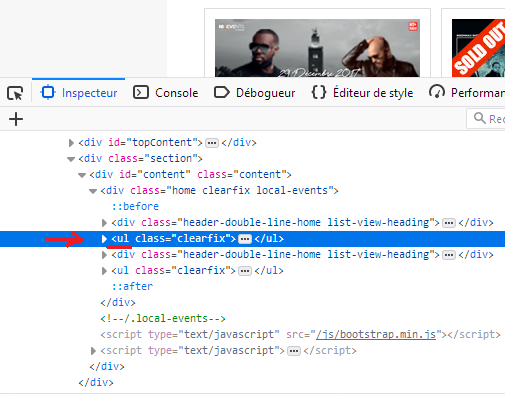

In [7]:
Image(filename="scraping_concerts.png")

In [8]:
concerts = concerts.find('ul')

In [9]:
concerts

<ul class="clearfix">
<li class="tfly-event-id- vevent" id="event-1773">
<a class="data-link" href="/ticket/concerts/festival-international-de-la-culture-aissaoua-du-18-au-20-avril-au-palais-mechouar-casablanca">
<img src="/upload/events/1773/original_Festival_Aissaoua_2019_205.jpg"> </img></a>
<div class="activity-tools">
<p>
<a class="overlay-trigger" href="/ticket/concerts/festival-international-de-la-culture-aissaoua-du-18-au-20-avril-au-palais-mechouar-casablanca">Acheter</a>
</p>
<ul>
<li><a class="activity-tools-facebook" href="javascript:void(0);" onclick="showBShareDialog('event-1773');return false">Facebook</a></li>
<li><a class="activity-tools-twitter" href="https://twitter.com/intent/tweet?text=Festival+International+de+la+culture+Aissaoua&amp;url=https%3A%2F%2Fwww.ticket.ma%2Fevent%2Ffestival-international-de-la-culture-aissaoua-du-18-au-20-avril-au-palais-mechouar-casablanca&amp;via=ticket_ma" target="_blank">Twitter</a></li>
</ul>
</div>
<h2 class="headliners summary">
<

## Scraping des noms

In [21]:
noms = []

In [22]:
for a in concerts.find_all('a',{"class":"data-link"}):
    noms.append("https://www.ticket.ma"+str(a['href']))

In [23]:
noms

['https://www.ticket.ma/ticket/concerts/festival-international-de-la-culture-aissaoua-du-18-au-20-avril-au-palais-mechouar-casablanca',
 'https://www.ticket.ma/ticket/concerts/apres-midi-chaabana-avec-othman-mouline-le-21-avril-2019-casablanca',
 'https://www.ticket.ma/ticket/concerts/combo-jazz-le-28-avril-2019-au-theatre-afif-el-jadida',
 'https://www.ticket.ma/ticket/concerts/combo-jazz-le-29-avril-2019-au-theatre-mohamed-vi-casablanca',
 'https://www.ticket.ma/ticket/concerts/combo-jazz-le-30-avril-2019-au-theatre-national-mohamed-v-rabat',
 'https://www.ticket.ma/ticket/concerts/laylat-chaabana-le-03-mai-2019-au-theatre-national-mohamed-v-rabat',
 'https://www.ticket.ma/ticket/concerts/said-berrada-le-19-mai-a-la-salle-allal-al-fassi-rabat']

## Scraping des dates

In [13]:
concerts.find_all('p',{"class":"event-date"})

[<p class="event-date" style="text-transform: capitalize;">
 											jeudi 18 avril 2019											· 200 Dhs											
 										</p>, <p class="event-date" style="text-transform: capitalize;">
 											dimanche 21 avril 2019											· 350 Dhs											
 										</p>, <p class="event-date" style="text-transform: capitalize;">
 											dimanche 28 avril 2019											· 100 Dhs											
 										</p>, <p class="event-date" style="text-transform: capitalize;">
 											lundi 29 avril 2019											· 150 Dhs											
 										</p>, <p class="event-date" style="text-transform: capitalize;">
 											mardi 30 avril 2019											· 150 Dhs											
 										</p>, <p class="event-date" style="text-transform: capitalize;">
 											vendredi 03 mai 2019											· 150 Dhs											
 										</p>, <p class="event-date" style="text-transform: capitalize;">
 											dimanche 19 mai 2019											· 100 Dhs											
 										</p>]

In [14]:
d = []
for i in concerts.find_all('p',{"class":"event-date"}):
    d.append(i.get_text().replace("\t","").replace("\n",""))

In [15]:
d

['jeudi 18 avril 2019· 200 Dhs',
 'dimanche 21 avril 2019· 350 Dhs',
 'dimanche 28 avril 2019· 100 Dhs',
 'lundi 29 avril 2019· 150 Dhs',
 'mardi 30 avril 2019· 150 Dhs',
 'vendredi 03 mai 2019· 150 Dhs',
 'dimanche 19 mai 2019· 100 Dhs']

In [16]:
dates = []
for i in d:
    a,b = i.split('·')
    dates.append(a)

In [17]:
dates

['jeudi 18 avril 2019',
 'dimanche 21 avril 2019',
 'dimanche 28 avril 2019',
 'lundi 29 avril 2019',
 'mardi 30 avril 2019',
 'vendredi 03 mai 2019',
 'dimanche 19 mai 2019']

# Test de la fonction Ticket

In [27]:
def ticket(lien):
    url = lien
    response = requests.get(url)
    print(response)
    
    soup = BeautifulSoup(response.text,'html.parser')
    type(soup)
    
    #focus sur le cadre de travail
    event = soup.find('article',{'class':'event'})
    
    #extraire le nom
    nom = event.find('div',{'class':'event-titles'}).get_text().replace('\n','')
    
    #extraire la localisation
    lieu = event.find('a',{'class':'fancybox map-location'}).get_text()
    
    #extraire l'heure du début du spectacle
    heure = event.find('span',{'class':'start dtstart'}).get_text()
    heure = heure[-5:]
    
    #retourner sous forme de tuple (nom, localisation, heure)
    return (nom,lieu,heure)
    

In [28]:
t1 = ticket(noms[0])

<Response [200]>


In [29]:
t1

('Festival International de la culture Aissaoua', 'Palais Méchouar', '21h00')